In [48]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import os
import shutil
import pandas as pd

In [49]:
normal_input_data_path = "C:\\Users\\Mud\\Desktop\\2ndPaper\\roi_data\\round_6\\[ROI]CF6.0_B01_N01.npy"
normal_data = np.load(normal_input_data_path)

abnormal_input_data_path = r"C:\Users\Mud\Desktop\2ndPaper\roi_data\size-21\round_6\abnormal\[ROI]CF6.0_B21_N02.npy"
abnormal_data = np.load(abnormal_input_data_path)

critical_frames = [0, 90, 100, 110, 120, 130, 400]

In [50]:
def visualize_frames(data, prefix=""):
    for frame in critical_frames:
        plt.imshow(data[frame], cmap='gray')
        plt.axis('off')
        plt.subplots_adjust(0, 0, 1, 1)
        # plt.show()
        plt.savefig(f"./outlier/{prefix}_frame_{frame}.png", bbox_inches='tight', pad_inches=0, dpi=500)

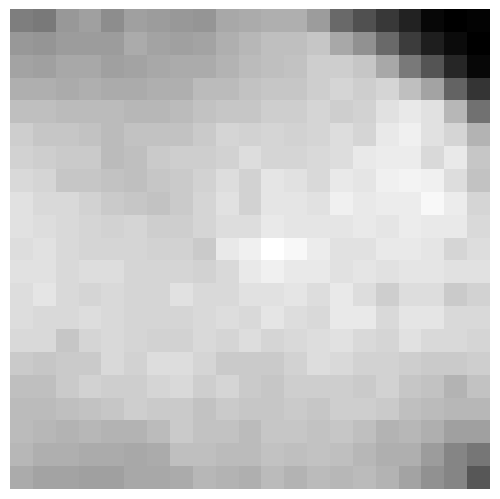

In [51]:
visualize_frames(data=normal_data, prefix="normal")

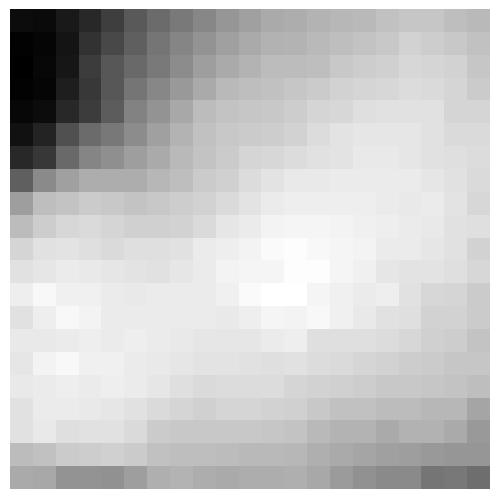

In [52]:
visualize_frames(data=abnormal_data, prefix="abnormal")

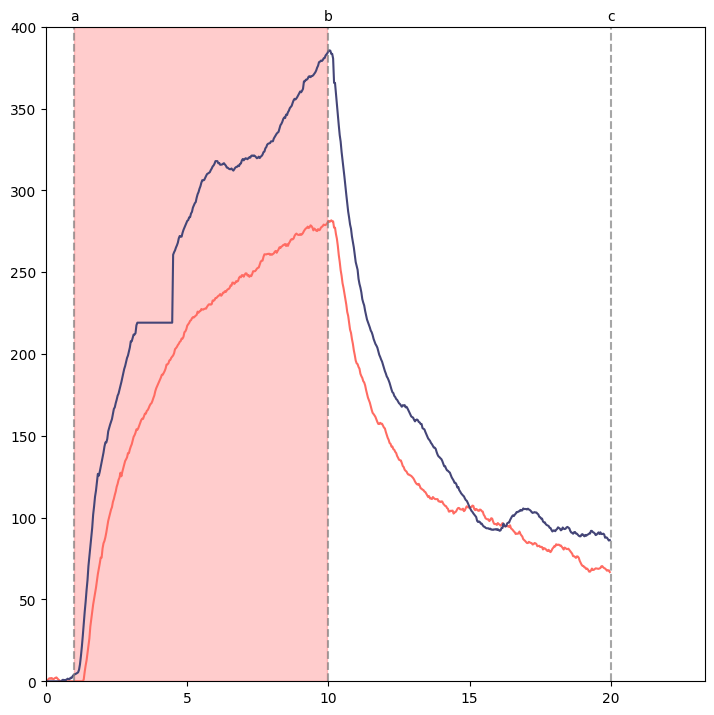

: 

In [ ]:
def normalize_curve_mean_method1(input_data):
    mean = np.mean(input_data[:30])
    normalized_data = np.maximum(input_data - mean, 0)
    return normalized_data

def plot_mean_curve(normal, abnormal):
    normal_mean_curve = np.mean(normal, axis=(1, 2))
    abnormal_mean_curve = np.mean(abnormal, axis=(1, 2))
    normalized_normal_curve = normalize_curve_mean_method1(normal_mean_curve)
    normalized_abnormal_curve = normalize_curve_mean_method1(abnormal_mean_curve)

    fps = 30
    time = np.arange(len(normal_mean_curve)) / fps

    square_wave = np.full(len(time), np.nan)
    start_frame = int(1 * fps)
    end_frame = int(10 * fps)
    square_wave[start_frame:end_frame] = 400

    fig, ax = plt.subplots(figsize=(8.5, 8.5))
    ax.plot(time, normalized_normal_curve, label='Normalized Mean Curve (Normal)', color='#ff6b62')
    ax.plot(time, normalized_abnormal_curve, label='Normalized Mean Curve (Abnormal)', color='#444577')
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlim(0, 700/fps)
    ax.set_ylim(0, 400)

    dotted_lines = np.array([30, 300, 600]) / fps
    labels = ['a', 'b', 'c']
    for x, label in zip(dotted_lines, labels):
        ax.axvline(x=x, color='gray', linestyle='--', alpha=0.7)
        ax.text(x, ax.get_ylim()[1]*1.01, label, color='black', fontsize=10, ha='center')

    ax.fill_between(time, square_wave, color='red', alpha=0.2, label='Heat Pulse')
    plt.savefig('./outlier/2d.svg', format='svg', bbox_inches='tight')
    plt.show()

plot_mean_curve(normal_data, abnormal_data)